# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [12]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Como podemos ver no hay ningun valor NAN en nuestro dataset. Si hubiera los eliminariamos con la funcion "dropna".
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [13]:
# Recuerda que el Axis=0 son las FILAS y el Axis=1 COLUMNAS

print('Row count is:',sensor.shape[0])
print('Column count is:',sensor.shape[1])

Row count is: 1751
Column count is: 12


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [22]:
dates = pd.date_range(
    start = "1/1/2018 00:00:00",
    end = "1/1/2018 00:29:10",
    periods = sensor.shape[0]
)

dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [45]:
sensor.index = pd.DatetimeIndex(dates, freq = "infer")
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [69]:
res = seasonal_decompose(sensor['userAcceleration.x'], period = 60)

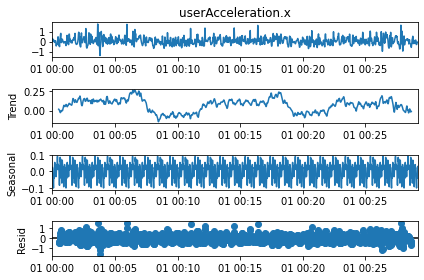

In [70]:
res.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

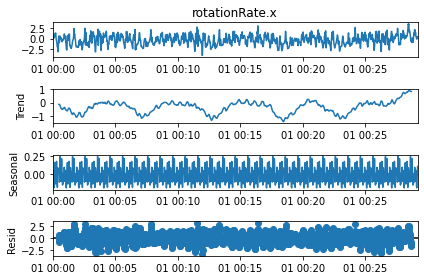

In [64]:
res = seasonal_decompose(sensor['rotationRate.x'], period = 60)
res.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

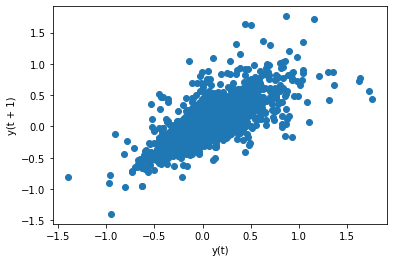

In [81]:
'''
El lag_plot es un tipo de scatterplot pero de dos variables "lagged". El lag mas comun es 1.
Lo que permiten mostarr estas graficas es: 
    - Model suitability.
    - Outliers (data points with extremely high or low values).
    - Randomness (data without a pattern).
    - Serial correlation (where error terms in a time series transfer from one period to another).
    - Seasonality (periodic fluctuations in time series data that happens at regular periods).

(https://www.statisticshowto.com/lag-plot/)

'''


pd.plotting.lag_plot(sensor['userAcceleration.x'], lag=1)

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

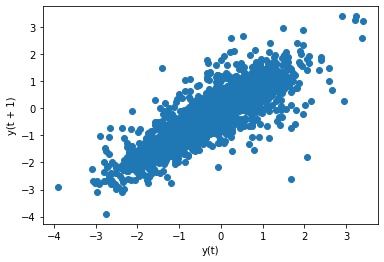

In [82]:
pd.plotting.lag_plot(sensor['rotationRate.x'], lag=1)

What are your conclusions from both visualizations?

* Respecto al "Model suitability", ambas graficas parecen tener una forma linial en vez de una forma eliptica. La forma lineal de la gráfica sugiere que un modelo autorregresivo es probablemente una mejor opción.

* En ambas graficas podemos observar que existen outliers aunque me atreveria a decir que en la primera grafica hay mas outliers acumulados (tanto arriba como abajo) y en la segunda grafica nos escontramos outliers mas dispersos pero CON MUCHA MAS DISTANCIA  a la tendencia (si nos fijamos en el eje x de ambas graficas podremos entender esta ultima afirmacion)

* Ninguna de las graficas son random, tienen un trend creciente pero si entramos en profuncdidad encontraremos ciertos trozos de la grafica (datos) que se definan como random (aqui dentro estarian los outliers).

* En ambas graficas hay cierta correlacion pero visualmente podemos afirmar que la segunda grafica tiene mayor correlacion.

* En nignuna de las graficas podemos diferenciar una seasonality

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

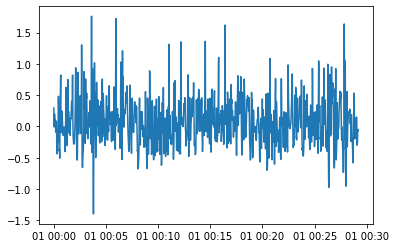

In [84]:
# Augmented Dickey Fuller test: para comprobas si nuestras variables tienen estaciones o no
plt.plot(sensor['userAcceleration.x'])

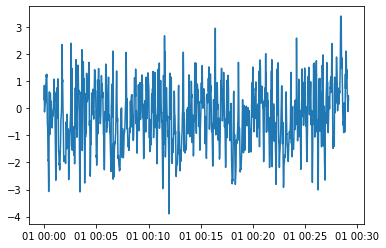

In [85]:
plt.plot(sensor['rotationRate.x'])

What are your conclusions from this test?

* Ambas graficas tienes estacionalidad y las lineas muy sobresalidas podemos llegar a la concluion que eran essos outliers que hemos definido antes



Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [88]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

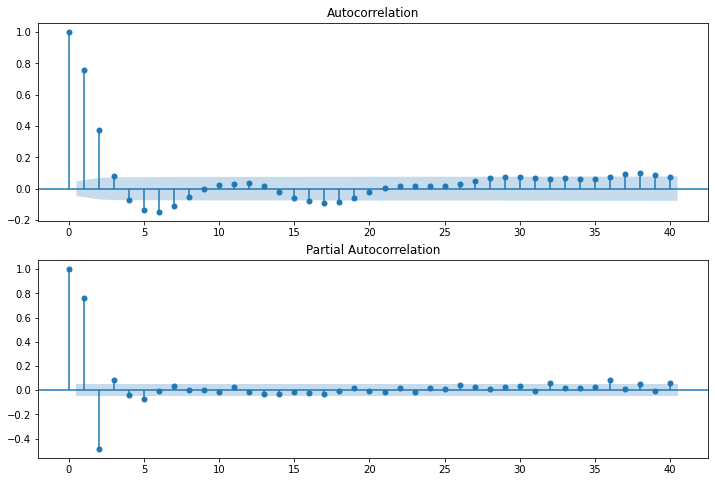

In [89]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sensor['userAcceleration.x'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sensor['userAcceleration.x'], lags=40, ax=ax2)

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [120]:
import statsmodels.api as sm

import numpy as np

from statsmodels.tools.validation import array_like

In [98]:
# ESTO ME DA ERROR (se que esta mal pero no encuentro otra funcion... o soy una bestia y no lo he hecho paso a paso)
# statsmodels.tools.eval_measures.rmse(sensor['userAcceleration.x'].tail(10), axis=0)

In [133]:
def rmse(x1, axis=0):
    """root mean squared error

    Parameters
    ----------
    x1, x2 : array_like
       The performance measure depends on the difference between these two
       arrays.
    axis : int
       axis along which the summary statistic is calculated

    Returns
    -------
    rmse : ndarray or float
       root mean squared error along given axis.

    Notes
    -----
    If ``x1`` and ``x2`` have different shapes, then they need to broadcast.
    This uses ``numpy.asanyarray`` to convert the input. Whether this is the
    desired result or not depends on the array subclass, for example
    numpy matrices will silently produce an incorrect result.
    """
    x1 = int(np.asanyarray(sensor['userAcceleration.x'].tail(10)))
    #x2 = np.asanyarray(x2)
    mse = np.mean((x1)^2)
    return np.sqrt(mse(x1, axis=axis))


# uso de este link para intentar solucionar este apartado : https://www.statsmodels.org/stable/_modules/statsmodels/tools/eval_measures.html

In [134]:
x1 = np.asanyarray(sensor['userAcceleration.x'].tail(10))
x1

array([ 0.149749,  0.038461, -0.169175, -0.300361, -0.270174, -0.268367,
       -0.102444, -0.08559 , -0.048105, -0.065011])

In [137]:
# rmse(x1, axis=1)

'''
DUDAS!!

1. El error que me sale -->  TypeError: only size-1 arrays can be converted to Python scalars
   he buscado el error en stackoverflow y decia que alomejor era porque el elavdo al cuadrado tenia que esta con este simbolo (^)

2. Tengo que hacer la diferencia pero no se con que otra variable la tengo que comparar o, es que tengo que hacer la diferencia entre los ultimos 10 valores de la variable: 'userAcceleration.x'

'''